## Task 2.1 fourier_analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
def accuracy(data, l):
    # Measure accuracy using MSE
    data_matrix = utils.create_distance_matrix(data)
    check = np.array([data_matrix[: ,0],data_matrix[: ,l]]).T
    check_matrxi = utils.create_distance_matrix(check)
    print(np.mean(data_matrix - check_matrxi))

In [3]:

# TODO: Create a periodic dataset with the details described in the task-sheet
N = 1000
t = 2 * np.pi * np.arange(1, N+1) / (N+1)
X = np.vstack((np.cos(t), np.sin(t))).T

[]

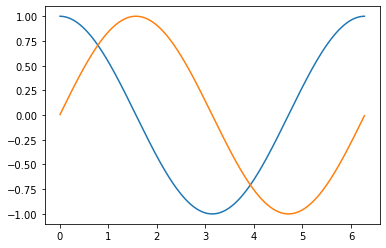

In [4]:
plt.plot(t, X)
plt.plot()

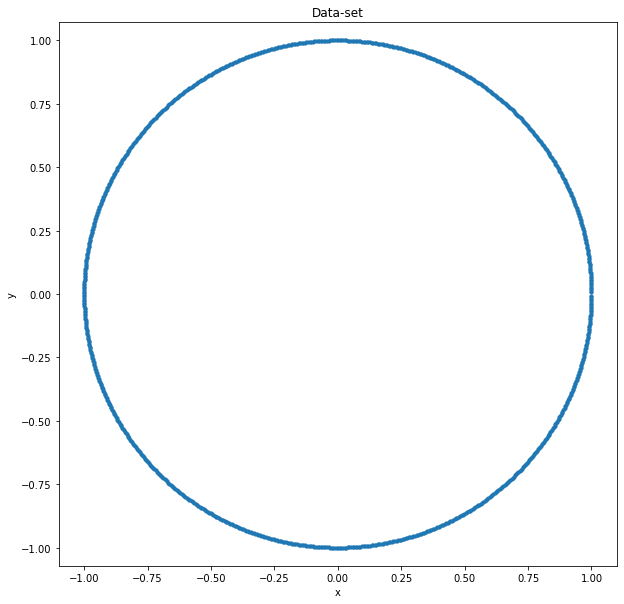

In [5]:
# TODO: Visualize data-set
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data-set')
plt.axis('equal')
plt.show()

In [6]:
# TODO: Plot 5 eigenfunctions associated to the largest eigenvalues using the function diffusion_map() implemented in utils.py
lambdas, phi = utils.diffusion_map(X)

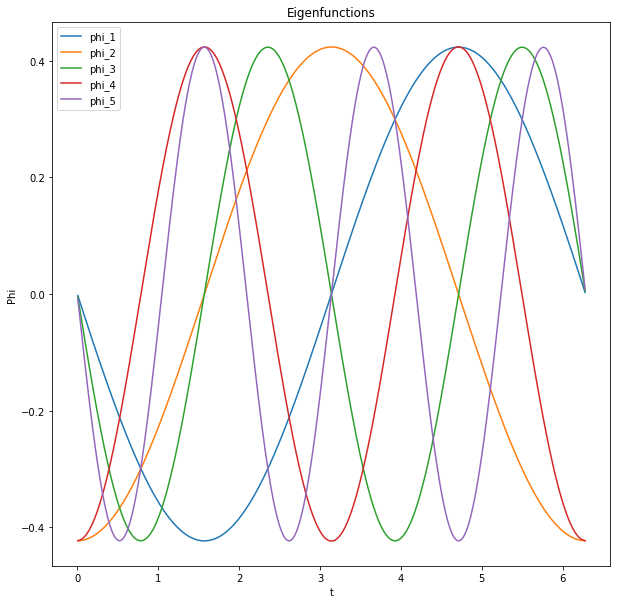

In [7]:
# TODO: Plot 5 eigenfunctions
plt.figure(figsize=(10, 10))
for i in range(1, 6):
    plt.plot(t, phi[:, i], label=f'phi_{i}')
plt.xlabel('t')
plt.ylabel('Phi')
plt.legend()
plt.title('Eigenfunctions')
plt.show()

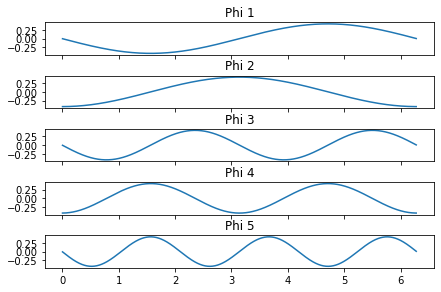

In [8]:
# Separate comparison plots
fig, axs = plt.subplots(5, sharex=True)
fig.tight_layout()
for i in range(1, 6):
    axs[i-1].set_title("Phi {}".format(i))
    axs[i-1].plot(t, phi[:, i], label=f'phi_{i}')

In [9]:
# Measure accuracy using MSE
print(accuracy(X, 2))

0.29071777373940894
None


## Task 2.2 swiss_roll

In [10]:
from sklearn.datasets import make_swiss_roll
# TODO: Generate swiss roll dataset
N = 5000
X, _ = make_swiss_roll(n_samples=N, noise=0.0)

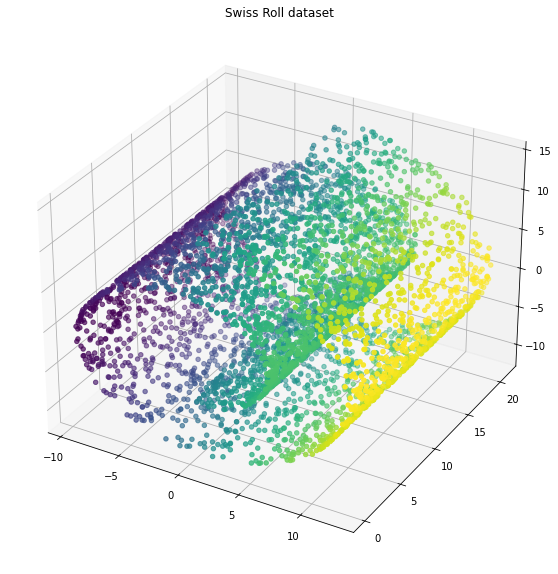

In [11]:
# TODO: Visualize data-set
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0])
ax.set_title("Swiss Roll dataset")
plt.show()

In [12]:
# TODO: Use function diffusion_map() defined in utils to compute first ten eigenfunctions (corresponding to 10 largest eigenvalues) of the Laplace Beltrami operator on the “swiss roll” manifold
lambdas, phi = utils.diffusion_map(X, n_eig_vals=10)

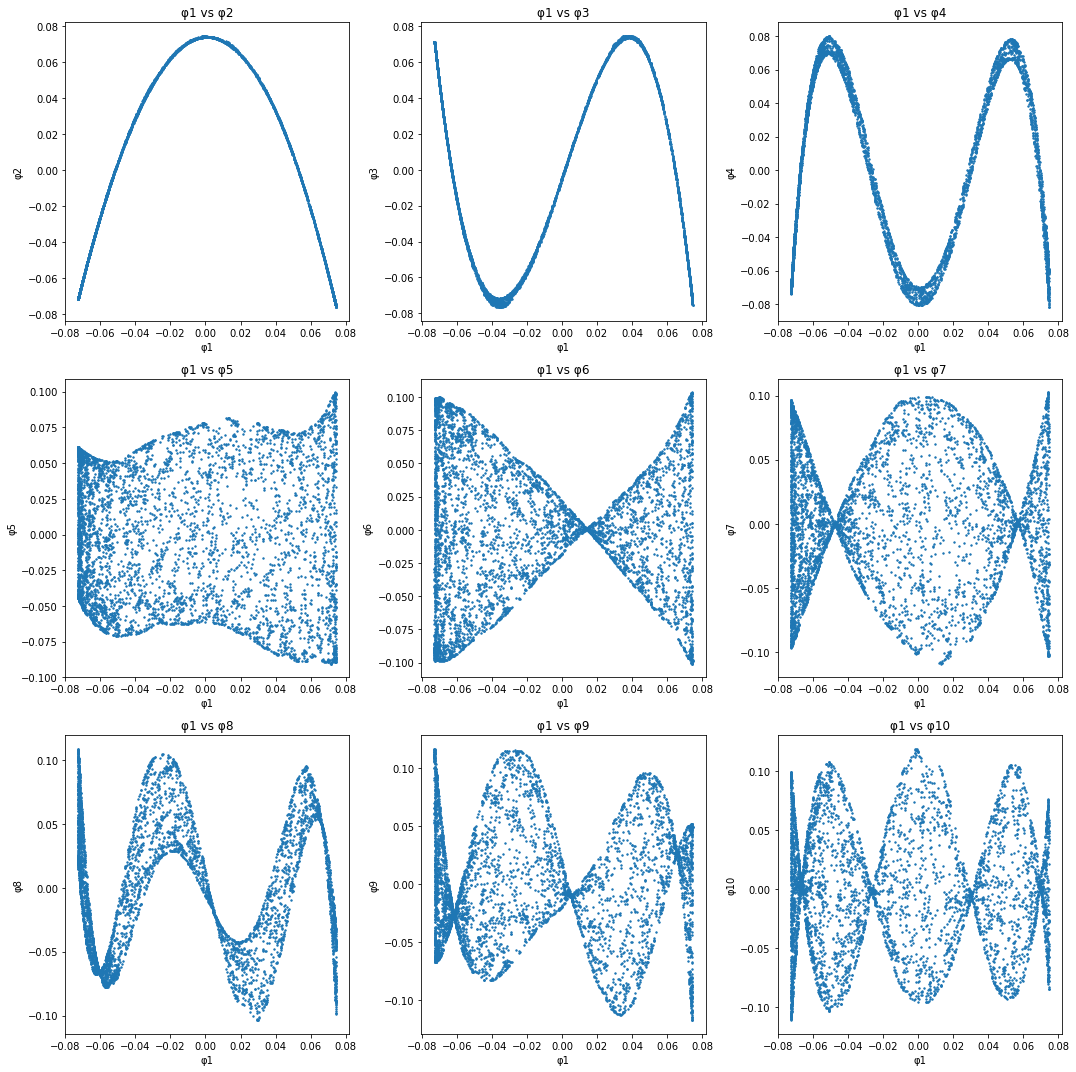

In [13]:
phi_1 = phi[:, 1]
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axes.flat, start=2):
    ax.scatter(phi_1, phi[:, i], s=2)
    ax.set_xlabel('φ1')
    ax.set_ylabel(f'φ{i}')
    ax.set_title(f'φ1 vs φ{i}')

plt.tight_layout()
plt.show()

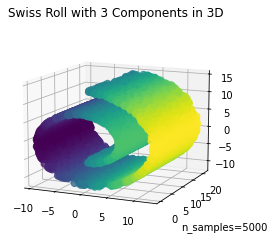

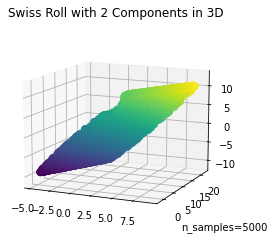

In [14]:
import pca
import importlib

# Reload the module to see changes
importlib.reload(pca)
U, S, Vt = pca.compute_svd(X)
pca.reconstruct_images(U, S, Vt)


In [15]:
# Measure accuracy using MSE
print(accuracy(X, 5))

6.409225290479368
None


In [16]:
# What happens if 1000 data points are used
N = 1000
X, _ = make_swiss_roll(n_samples=N, noise=0.0)

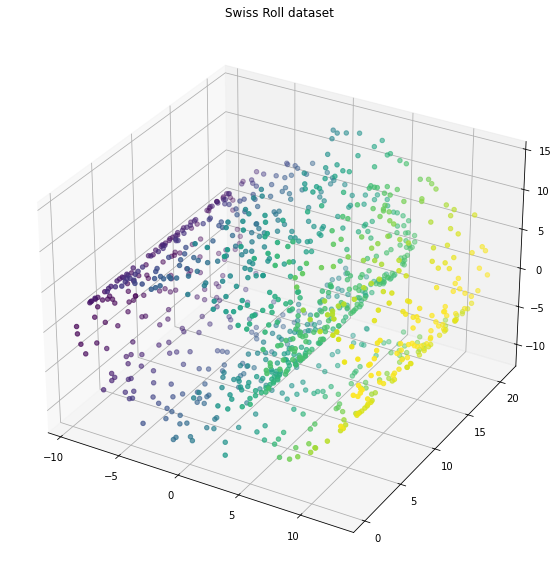

In [17]:
# TODO: Visualize data-set
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0])
ax.set_title("Swiss Roll dataset")
plt.show()

In [18]:
# TODO: Use function diffusion_map() defined in utils to compute first ten eigenfunctions (corresponding to 10 largest eigenvalues) of the Laplace Beltrami operator on the “swiss roll” manifold
lambdas, phi = utils.diffusion_map(X, n_eig_vals=10)

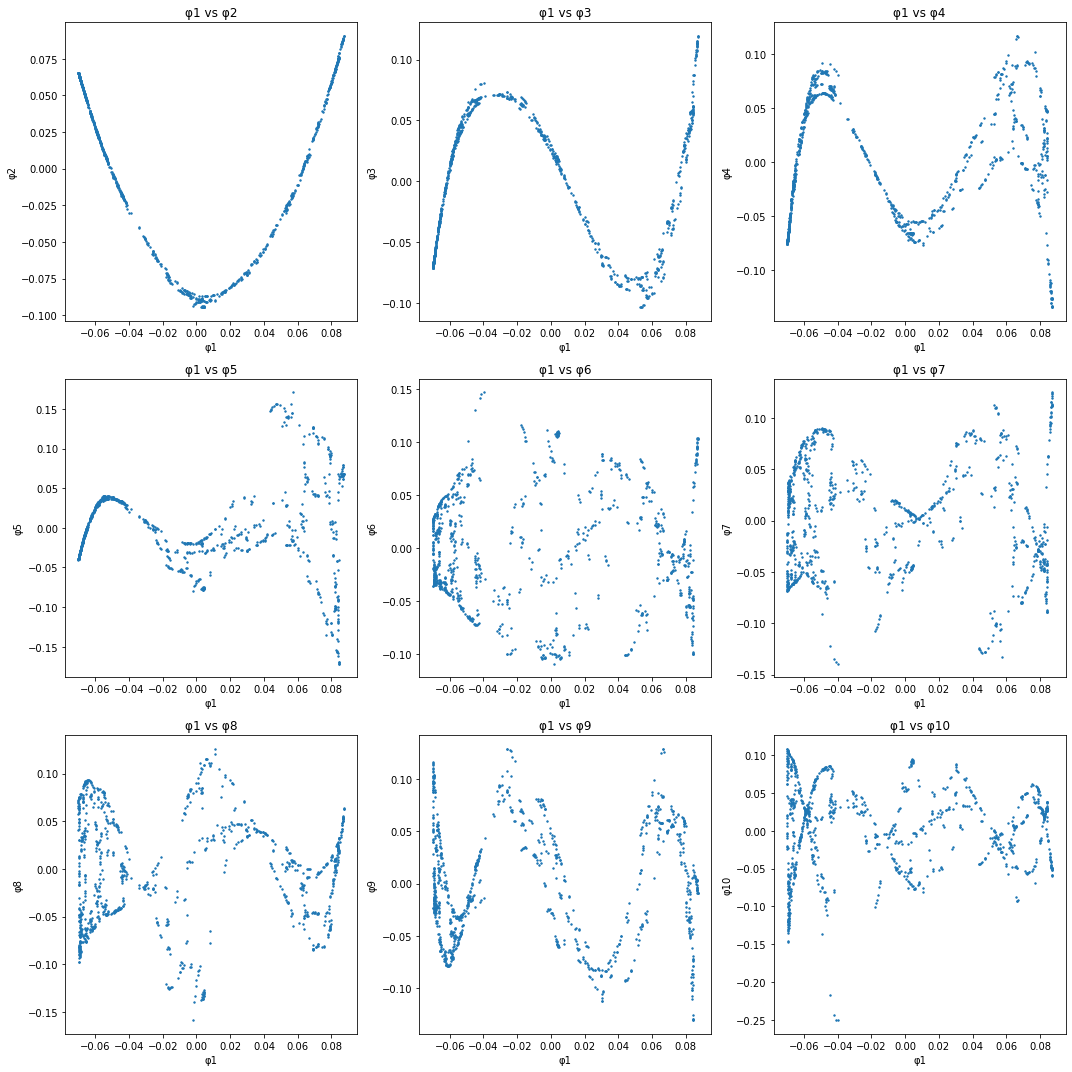

In [19]:
phi_1 = phi[:, 1]
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axes.flat, start=2):
    ax.scatter(phi_1, phi[:, i], s=2)
    ax.set_xlabel('φ1')
    ax.set_ylabel(f'φ{i}')
    ax.set_title(f'φ1 vs φ{i}')

plt.tight_layout()
plt.show()

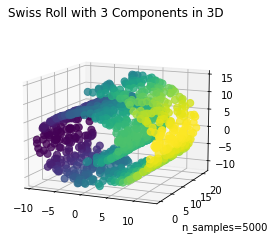

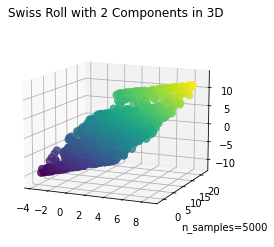

In [20]:
U, S, Vt = pca.compute_svd(X)
pca.reconstruct_images(U, S, Vt)

In [21]:
# Measure accuracy using MSE
print(accuracy(X, 5))

5.307824068131373
None


## Task 2.3 trajectory_data

In [22]:
# TODO: Create a periodic dataset with the details described in the task-sheet
data = np.loadtxt('../../data/data_DMAP_PCA_Vadere.txt', delimiter=' ')

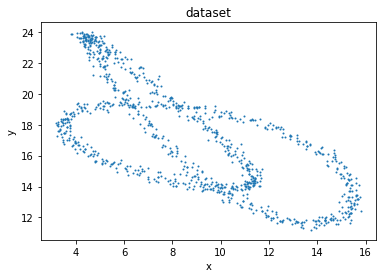

In [23]:
# TODO: Visualize data-set
plt.scatter(data[:, 0], data[:, 1], s=1)
plt.title('dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

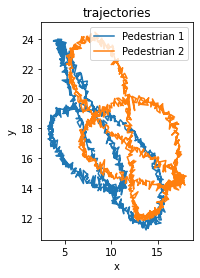

In [24]:
pedestrian_1 = data[:, :2]
pedestrian_2 = data[:, 2:4]
# TODO: Visualize trajectories of first two pedestrians (Hint: You can optionally use utils.visualize_traj_two_pedestrians() )
pca.visualize_traj_two_pedestrians(pedestrian_1, pedestrian_2, ('trajectories', 'x', 'y'))
plt.show()

In [25]:
# TODO: Compute eigenfunctions associated to the largest eigenvalues using function diffusion_map() implemented in utils.py
lambdas, phi = utils.diffusion_map(data)

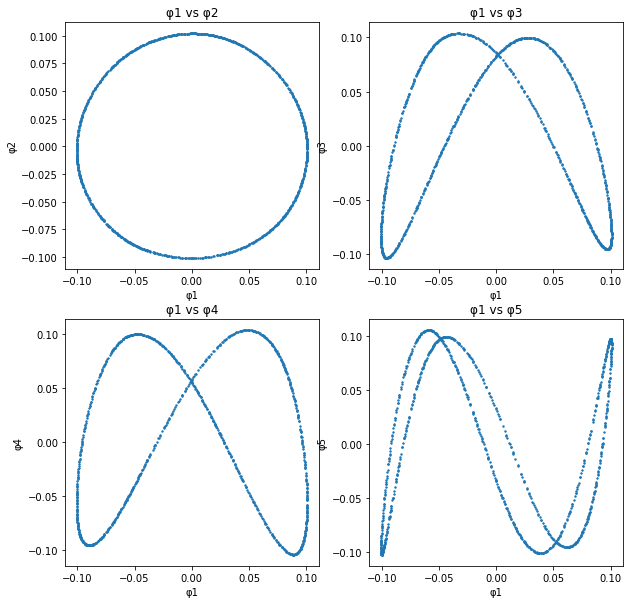

In [26]:
# TODO: Plot plot the first non-constant eigenfunction φ1 against the other eigenfunctions
phi_1 = phi[:, 1]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat, start=2):
    ax.scatter(phi_1, phi[:, i], s=2)
    ax.set_xlabel('φ1')
    ax.set_ylabel('φ{}'.format(i))
    ax.set_title(f'φ1 vs φ{i}')
plt.show()

In [28]:
# Measure accuracy using MSE
print(accuracy(data, 5))

13.697053088833748
None
